In [1]:
import numpy as np


In [72]:
def MCMC(chisq, width, **kwargs):
    len_chain = kwargs['len_chain'] if 'len_chain' in kwargs else 1000
    ndim = kwargs['ndim'] if 'ndim' in kwargs else 3
    theta_old = np.random.uniform(-10,10, size = ndim)
    print(f'theta_old: {theta_old}')
    minus_loglike_old = -chisq(*theta_old)/2
    chain = [theta_old]
    loglike = [minus_loglike_old]
    weights = [1]
    step  = 0
    while step < len_chain:
        theta_new = theta_old + np.random.normal(0,width, size=ndim)
        minus_loglike_new = -chisq(*theta_new)/2 #-loglike =  - chi^2/2
        if minus_loglike_new > minus_loglike_old:  # new step has better likelihood
            chain.append(theta_new)
            loglike.append(minus_loglike_new)
            weights.append(int(1))
            theta_old = theta_new
            minus_loglike_old = minus_loglike_new
        else:   # new step has worse likelihood
            log_accept_prob = np.log(np.random.uniform(0,1))
            loglike_ratio = (minus_loglike_new - minus_loglike_old)
            if loglike_ratio > log_accept_prob: # accept the new step
                chain.append(theta_new)
                loglike.append(minus_loglike_new)
                weights.append(int(1))
                theta_old = theta_new
                minus_loglike_old = minus_loglike_new
            else:   # reject the new step
                weights[-1] += int(1)
        step += 1
    return np.array(chain), np.array(weights), np.array(loglike)

In [11]:
data = np.loadtxt('MCMC_data_set_with_errorbars1.txt')
xarr = data[:,0]; yarr = data[:,1]; yerr = data[:,2]

def quadratic(a,b,c,x):
    return a*x**2 + b*x + c

def chisq_quadratic(a,b,c):
    chisq_val = 0
    for x,y, err in zip(xarr,yarr, yerr):
        model = quadratic(a,b,c,x)
        chisq_val += ((y - model)**2)/err**2
    return chisq_val

In [73]:
chains, weights, loglikes =  MCMC(chisq_quadratic, width=0.015, len_chain=10000, ndim=3)
burnin = int(0.4*len(chains))
chains,weights, loglikes =  chains[burnin:], weights[burnin:], loglikes[burnin:]
acceptance_ratio = len(chains)/10000

print(f'Acceptance ratio: {acceptance_ratio}')

theta_old: [-2.98610739  5.38676795  6.46439841]
Acceptance ratio: 0.2108


# 1. 

Best-fit parameters: a=0.49323083974429227, b=0.18217302955052, c=0.3664929854766832
Minimum chi-square: 79.86685644753061


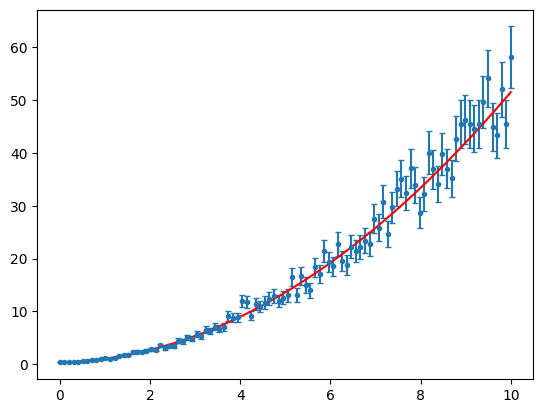

In [70]:
bestfit = chains[np.argmax(loglikes)]
print(f'Best-fit parameters: a={bestfit[0]}, b={bestfit[1]}, c={bestfit[2]}')
print(f'Minimum chi-square: {loglikes[np.argmax(loglikes)]*-2}')
import matplotlib.pyplot as plt
plt.errorbar(xarr, yarr, yerr = yerr, fmt='o', capsize=2, ms=3)
plt.plot(xarr, quadratic(bestfit[0], bestfit[1], bestfit[2], xarr), color='red')

#  2.

Text(0, 0.5, 'c')

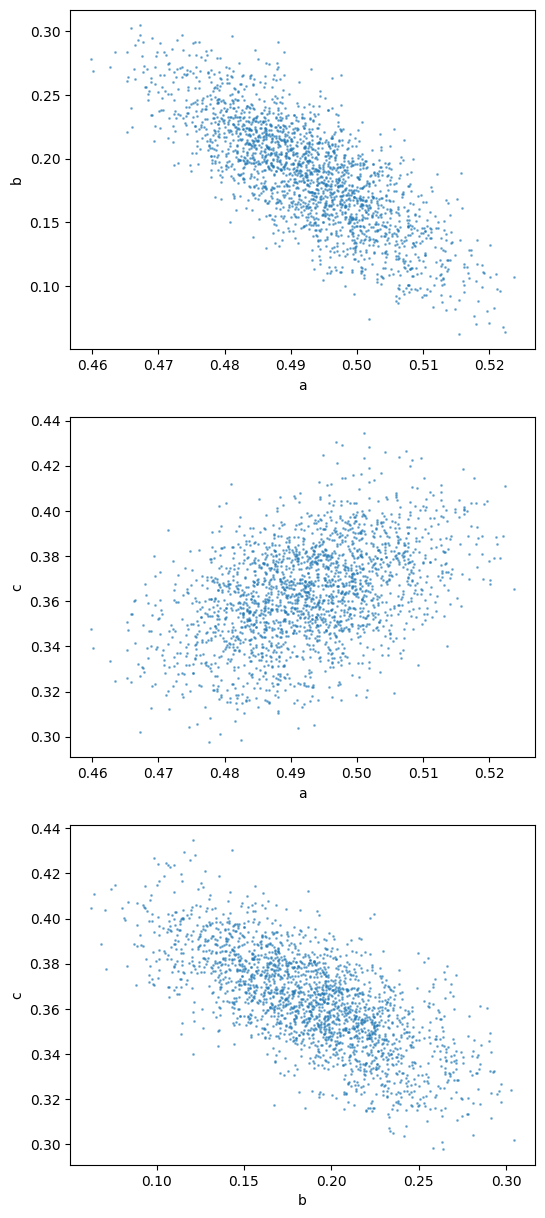

In [77]:
fig, ax = plt.subplots(3,1, figsize=(6,15))
ax[0].scatter(chains[:,0], chains[:,1], s=1, alpha=0.5)
ax[0].set_xlabel('a'); ax[0].set_ylabel('b')
ax[1].scatter(chains[:,0], chains[:,2], s=1, alpha=0.5)
ax[1].set_xlabel('a'); ax[1].set_ylabel('c')
ax[2].scatter(chains[:,1], chains[:,2], s=1, alpha=0.5)
ax[2].set_xlabel('b'); ax[2].set_ylabel('c')

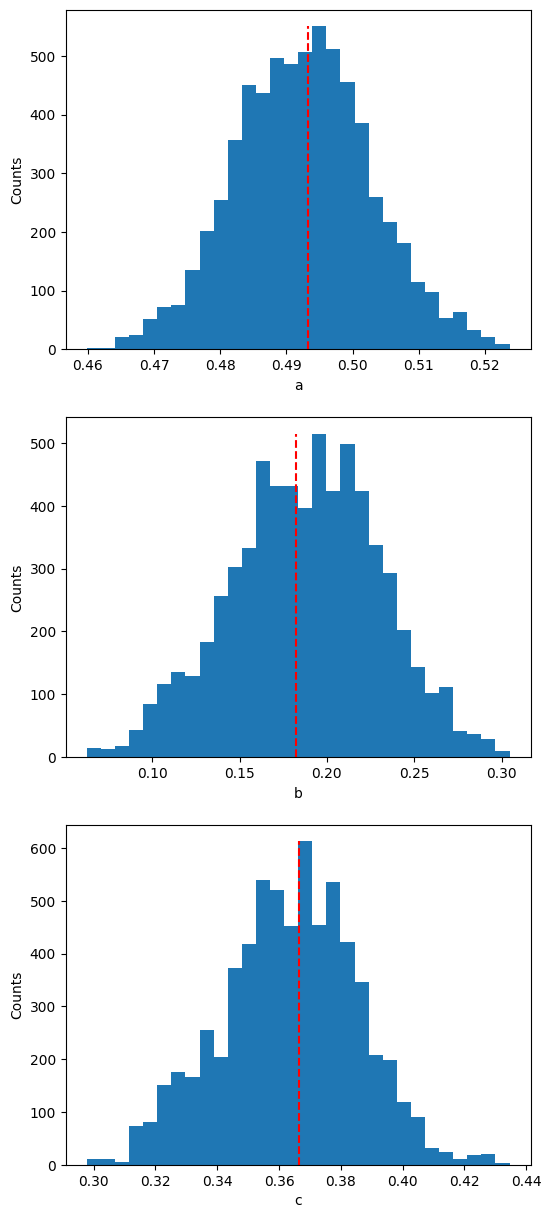

In [81]:
ahist, abin = np.histogram(chains[:,0], bins=30, weights=weights)
bhist,bbin = np.histogram(chains[:,1], bins=30, weights=weights)
chist, cbin = np.histogram(chains[:,2], bins=30, weights=weights)

fig, ax = plt.subplots(3,1, figsize=(6,15))
ax[0].bar(abin[:-1], ahist, width=np.diff(abin), align='edge')
ax[0].set_xlabel('a'); ax[0].set_ylabel('Counts')
ax[0].vlines(bestfit[0], ymin=0, ymax=max(ahist), color='red', linestyles='dashed')
ax[1].bar(bbin[:-1], bhist, width=np.diff(bbin), align='edge')
ax[1].set_xlabel('b'); ax[1].set_ylabel('Counts')
ax[1].vlines(bestfit[1], ymin=0, ymax=max(bhist), color='red', linestyles='dashed')
ax[2].bar(cbin[:-1], chist, width=np.diff(cbin), align='edge')
ax[2].set_xlabel('c'); ax[2].set_ylabel('Counts')
ax[2].vlines(bestfit[2], ymin=0, ymax=max(chist), color='red', linestyles='dashed')

Removed no burn in


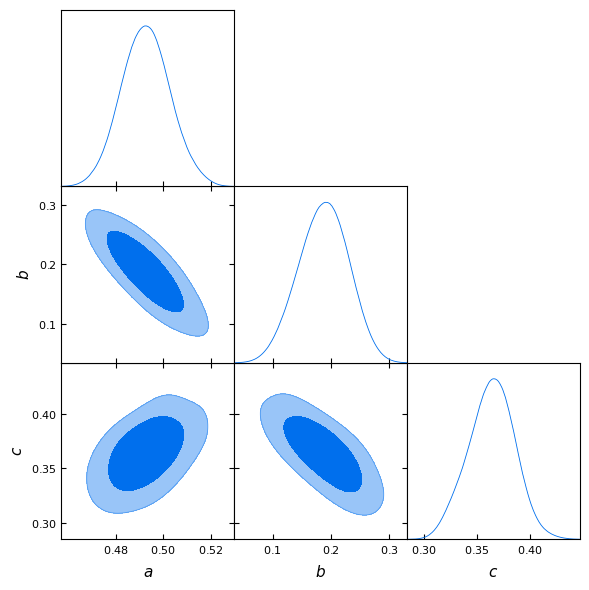

In [79]:
from getdist import plots, MCSamples

g = plots.getSubplotPlotter()
samples = MCSamples(samples=chains, weights=weights, names=['a','b','c'], labels=['a','b','c'])
g.triangle_plot(samples, filled=True)

# 3.

In [91]:
import numpy as np

def exponential(a,x):
    return a*x**2

def chisq_exponential(a):
    chisq_val = 0
    for x,y, err in zip(xarr,yarr, yerr):
        model = exponential(a,x)
        chisq_val += ((y - model)**2)/err**2
    return chisq_val

chains_2, weights_2, loglikes_2 =  MCMC(chisq_exponential, width=0.02, len_chain=10000, ndim=1)


theta_old: [-1.71857054]


In [92]:
burnin_2 = int(0.4*len(chains_2))
chains_2,weights_2, loglikes_2 =  chains_2[burnin_2:], weights_2[burnin_2:], loglikes_2[burnin_2:]
acceptance_ratio_2 = len(chains_2)/10000

print(f'Acceptance ratio: {acceptance_ratio_2}')

Acceptance ratio: 0.2046


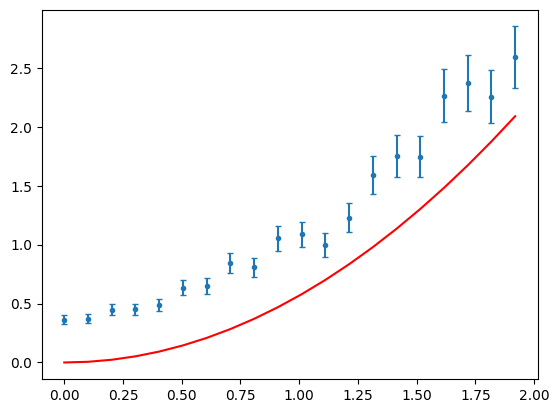

In [97]:
plt.errorbar(xarr[:20], yarr[:20], yerr = yerr[:20], fmt='o', capsize=2, ms=3)
plt.plot(xarr[:20], exponential(chains_2[np.argmax(loglikes_2)][0], xarr[:20]), color='red')

In [94]:
bestfit_2 = chains_2[np.argmax(loglikes_2)]
print(f'Best-fit parameter (exponential model): a={bestfit_2[0]}')
print(f'Minimum chi-square (exponential model): {loglikes_2[np.argmax(loglikes_2)]*-2}')
BIC_1 = -2*loglikes[np.argmax(loglikes)] + 3 * np.log(len(chains))
BIC_2 = -2*loglikes_2[np.argmax(loglikes_2)] + 1 * np.log(len(chains_2))
evid_1 = np.exp(-BIC_1/2)
evid_2 = np.exp(-BIC_2/2)
print(f'BIC (quadratic model): {BIC_1}')
print(f'BIC (exponential model): {BIC_2}')
print(f'Evidence (quadratic model): {evid_1}')
print(f'Evidence (exponential model): {evid_2}')

Best-fit parameter (exponential model): a=0.5672290231763814
Minimum chi-square (exponential model): 845.3826269770444
BIC (quadratic model): 102.83134371330762
BIC (exponential model): 853.006268923556
Evidence (quadratic model): 4.6822805217273127e-23
Evidence (exponential model): 5.916191032297444e-186
